In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline 
sns.set(style="ticks")

In [2]:
data = pd.read_csv('../../ML_datasets/heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [6]:
data.shape

(303, 14)

In [11]:
#3. Разделим выборку на обучающую и тестовую
x_train, x_test, y_train, y_test = train_test_split(
    data.loc[:, data.columns != 'target'], data['target'],
    test_size=0.2, random_state=1)

In [13]:
#Обучающая выборка
x_train.shape, y_train.shape

((242, 13), (242,))

In [14]:
#Тестовая выборка
x_test.shape, y_test.shape

((61, 13), (61,))

In [26]:
#4. Обучите модель ближайших соседей для произвольно заданного гиперпараметра K.
#Оцените качество модели с помощью трех подходящих для задачи метрик.

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score

In [20]:
# 2 ближайших соседа
cl1_1 = KNeighborsClassifier(n_neighbors=2)
cl1_1.fit(x_train, y_train)
target1_1 = cl1_1.predict(x_test)

target1_1, accuracy_score(y_test, target1_1)

(array([0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0], dtype=int64),
 0.4918032786885246)

In [23]:
# 4 ближайших соседа
cl1_2 = KNeighborsClassifier(n_neighbors=4)
cl1_2.fit(x_train, y_train)
target1_2 = cl1_2.predict(x_test)

target1_2, accuracy_score(y_test, target1_2)

(array([0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
        0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0], dtype=int64),
 0.5409836065573771)

In [28]:
#2 соседа
balanced_accuracy_score(y_test, target1_1),

(0.4935483870967742,)

In [29]:
#4 соседа
balanced_accuracy_score(y_test, target1_2)

0.5419354838709678

In [30]:
# По умолчанию метрики precision считаются для 1 класса бинарной классификации
#2 соседа
precision_score(y_test, target1_1), recall_score(y_test, target1_1)

(0.5, 0.3870967741935484)

In [31]:
#4 соседа
precision_score(y_test, target1_2), recall_score(y_test, target1_2)

(0.5555555555555556, 0.4838709677419355)

In [44]:
#5. Постройте модель и оцените качество модели с использованием кросс-валидации.
#Проведите эксперименты с тремя различными стратегиями кросс-валидации.
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import KFold, RepeatedKFold, ShuffleSplit, StratifiedKFold

In [39]:
col_x = data.loc[:, data.columns != 'target'].columns
col_x

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [40]:
#Значение метрики accuracy для 4 фолдов и среднее значение
scores = cross_val_score(KNeighborsClassifier(n_neighbors=5), 
                        data[col_x], data['target'], cv=4)
scores, np.mean(scores)

(array([0.62337662, 0.63157895, 0.65333333, 0.65333333]), 0.6404055593529278)

In [41]:
scoring = {'precision': 'precision_weighted', 
           'recall': 'recall_weighted',
           'f1': 'f1_weighted'}

#использование cross_validate, которая позволяет использовать для оценки несколько метрик и возращает более детальную информацию
scores = cross_validate(KNeighborsClassifier(n_neighbors=5), 
                        data[col_x], data['target'], scoring=scoring, 
                        cv=3, return_train_score=True)
scores

{'fit_time': array([0.008986  , 0.00900102, 0.0070014 ]),
 'score_time': array([0.02300262, 0.02999425, 0.02099681]),
 'test_f1': array([0.62181218, 0.60309602, 0.6568663 ]),
 'test_precision': array([0.62182853, 0.60270501, 0.66387408]),
 'test_recall': array([0.62376238, 0.6039604 , 0.66336634]),
 'train_f1': array([0.76742436, 0.72783702, 0.80497785]),
 'train_precision': array([0.76755968, 0.72798697, 0.80994419]),
 'train_recall': array([0.76732673, 0.72772277, 0.80693069])}

In [45]:
#Cтратегия кросс-валидации k-fold
scores = cross_val_score(KNeighborsClassifier(n_neighbors=3), 
                         data[col_x], data['target'], 
                         cv=KFold(n_splits=4))
scores

array([0.48684211, 0.51315789, 0.44736842, 0.30666667])

In [47]:
#ShuffleSplit
scores = cross_val_score(KNeighborsClassifier(n_neighbors=3), 
                         data[col_x], data['target'], 
                         cv=ShuffleSplit(n_splits=5, test_size=0.25))
scores

array([0.55263158, 0.55263158, 0.64473684, 0.60526316, 0.48684211])

In [53]:
#6. Произведите подбор гиперпараметра K с использованием GridSearchCV и кросс-валидации.
from sklearn.model_selection import GridSearchCV

n_range = np.array(range(2,32,2))
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters

[{'n_neighbors': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30])}]

In [54]:
clf_gs = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=5, scoring='accuracy')
clf_gs.fit(x_train, y_train)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_neighbors': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [55]:
clf_gs.cv_results_

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\

{'mean_fit_time': array([0.00879998, 0.00699844, 0.00779996, 0.0073988 , 0.01039872,
        0.00860209, 0.01399641, 0.00720196, 0.01120081, 0.00699973,
        0.00740113, 0.00799913, 0.00720029, 0.00719895, 0.0067987 ]),
 'mean_score_time': array([0.00659971, 0.01020007, 0.0073998 , 0.00540009, 0.00760136,
        0.00559778, 0.00620074, 0.0053977 , 0.00699873, 0.00539865,
        0.00639849, 0.00639982, 0.01879797, 0.01379838, 0.00939975]),
 'mean_test_score': array([0.59504132, 0.64049587, 0.62396694, 0.61157025, 0.59917355,
        0.60743802, 0.60330579, 0.61157025, 0.64049587, 0.63636364,
        0.65702479, 0.6322314 , 0.6446281 , 0.64876033, 0.64049587]),
 'mean_train_score': array([0.81817035, 0.78511612, 0.75822108, 0.73969594, 0.72418389,
        0.7076673 , 0.70972392, 0.70252323, 0.69942522, 0.69938783,
        0.69630033, 0.69321278, 0.68910487, 0.68487488, 0.68180858]),
 'param_n_neighbors': masked_array(data=[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30],
   

In [56]:
# Лучшая модель
clf_gs.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=22, p=2,
           weights='uniform')

In [57]:
# Лучшее значение метрики
clf_gs.best_score_

0.6570247933884298

In [58]:
# Лучшее значение параметров
clf_gs.best_params_

{'n_neighbors': 22}

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


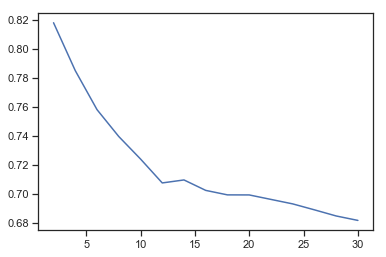

In [59]:
# Изменение качества на обучающей выборке
plt.plot(n_range, clf_gs.cv_results_['mean_train_score'])

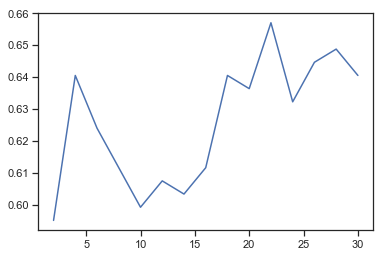

In [60]:
# Изменение качества на тестовой выборке
plt.plot(n_range, clf_gs.cv_results_['mean_test_score'])

In [62]:
#7. Повторите пункт 4 для найденного оптимального значения гиперпараметра K. 
#Сравните качество полученной модели с качеством модели, полученной в пункте 4.

# 22 ближайших соседа
cl_best = KNeighborsClassifier(n_neighbors=22)
cl_best.fit(x_train, y_train)
target_best = cl_best.predict(x_test)
target_best

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0], dtype=int64)

In [63]:
accuracy_score(y_test, target_best)

0.639344262295082

In [66]:
precision_score(y_test, target_best), recall_score(y_test, target_best)

(0.6451612903225806, 0.6451612903225806)

In [67]:
#8. Постройте кривые обучения и валидации.
from sklearn.model_selection import learning_curve, validation_curve

In [ ]:
from sklearn.model_selection import learning_curve, validation_curve

In [68]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from 'C:\\Users\\Admin\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

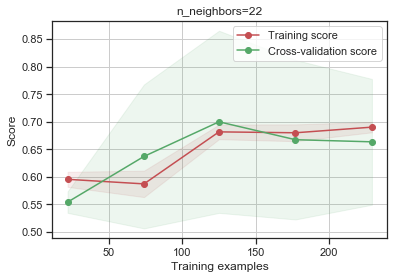

In [69]:
plot_learning_curve(KNeighborsClassifier(n_neighbors=22), 'n_neighbors=22', 
                    x_train, y_train, cv=20)

In [70]:
def plot_validation_curve(estimator, title, X, y, 
                          param_name, param_range, cv, 
                          scoring="accuracy"):
                                                   
    train_scores, test_scores = validation_curve(
        estimator, X, y, param_name=param_name, param_range=param_range,
        cv=cv, scoring=scoring, n_jobs=1)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title(title)
    plt.xlabel(param_name)
    plt.ylabel("Score")
    plt.ylim(0.0, 1.1)
    lw = 2
    plt.plot(param_range, train_scores_mean, label="Training score",
                 color="darkorange", lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="darkorange", lw=lw)
    plt.plot(param_range, test_scores_mean, label="Cross-validation score",
                 color="navy", lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=lw)
    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from 'C:\\Users\\Admin\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

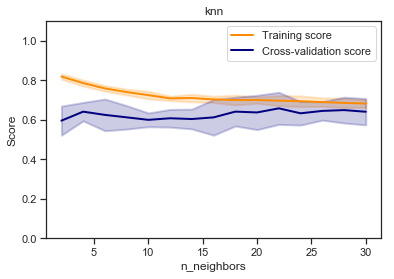

In [71]:
plot_validation_curve(KNeighborsClassifier(), 'knn', 
                      x_train, y_train, 
                      param_name='n_neighbors', param_range=n_range, 
                      cv=StratifiedKFold(n_splits=5), scoring="accuracy")